## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## The Function

In [13]:
def get_center(image_path, crop = None, skip_x = None, skip_y=None, contrast=110, plot=True):
    """
    Determines the coordinates of center and the radius of the drop

    Parameters
    ----------
    image_path : str
        Path to the image
    crop : tuple with (x,y,xf,yf), optional
        Coordinates to crop the image. The default is None.
    skip_x : int, optional
        Number of pixels to skip in x direction. The default is None.
    skip_y : int, optional
        Number of pixels to skip in y direction. The default is None.
    contrast : int, optional
        Contrast threshold. The default is 110.
    plot : bool, optional
        If True, plots the image. The default is True.

    Returns
    -------
    r : int
        Radius of the drop
    (x,y) : tuple
        Coordinates of the center
    """
    #Reading image
    im = plt.imread(image_path)
    im_c = im

    #Cropping image
    if crop is not None:
        im_c = im[crop[1]:crop[3], crop[0]:crop[2]]

    #Using contrast threshold
    im_f = (im_c>contrast).astype(int)
    skip_pixels_x = skip_x if skip_x is not None else 1
    
    #Along axis 0
    xs = im_f.argmin(axis=0)[skip_pixels_x:]
    xss = np.nonzero(xs)
    xl = skip_pixels_x+ xss[0][0]
    xr = skip_pixels_x+ xss[0][-1]

    #Along axis 1
    skip_pixels_y = skip_y if skip_y is not None else 1
    ys = im_f.argmin(axis=1)[:-skip_pixels_y]
    yss = np.nonzero(ys)
    yu = yss[0][0]
    yd = yss[0][-1]

    #Calculating center and radius
    r1 = np.abs((xl-xr))/2
    r2 = np.abs((yu-yd))/2
    r = int((r1+r2)/2)
    x = int(crop[0] + xl+ r)
    y = int(crop[1] + yu+ r)

    if plot:
        # Plotting the image with center
        plt.figure(figsize=(10,10))
        plt.imshow(im, cmap='gray')
        plt.hlines(y, 0, im.shape[1], color='g')
        plt.vlines(x, 0, im.shape[0], color='b')
        plt.annotate(f'{x,y}', xy=(x, y), xytext=(x+20, y+30), color='r')
        plt.axis('off')
        plt.show()
    return r, (x, y)

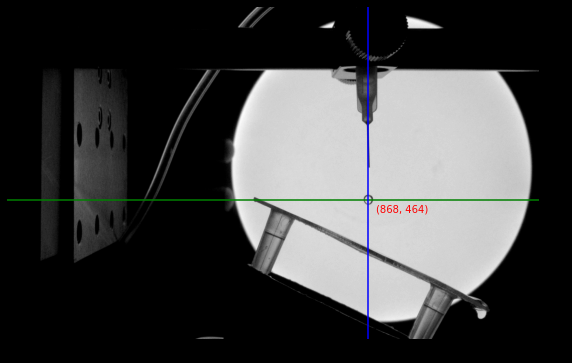

In [14]:
x0 = 800
y0 = 450
r, (x, y)=get_center('image.jpg', (x0, y0, 1000, 550))

In [10]:
r, x, y

(10, 868, 464)